## Variables categóricas
**Selección y generación de variables**

*J. Ramón Sánchez Leo - Febrero 2022*

Introducción a métodos para generar variables a partir de variables categóricas.
* One-Hot-Encoder.
* Label Encoder.
* Target Encoder.
* Imputar por proxy numérico.

Recuerda, el conocimiento de negocio siempre se debe tener en cuenta.

Conectamos nuestro notebook de Colab con Google Drive.

In [81]:
# from google.colab import drive
# drive.mount('/content/drive')

In [82]:
# Change directory
# import os
# os.chdir('drive/My Drive/Formacion/Selección_Generacion_Variables') # Put your path

In [83]:
# Load needed libraries
import pandas as pd
import numpy as np
import datetime
import math
import plotly.graph_objects as go

### Dataset
Vamos a trabajar con un **dataset de noticias** de un periódico en el que tenemos las siguientes columnas:

* datetime: fecha de publicación de la noticia.
* categoria: sección donde se publicó la noticia.
* titulo: título de la noticia.


In [84]:
df = pd.read_csv('../dat/noticias_sample.csv', sep = '\t', encoding = 'utf-8')

In [85]:
# Creamos una variable target binaria
df['target'] = np.random.randint(0, 3, df.shape[0]).astype('str')

In [86]:
df

,datetime,categoria,titulo,target
0,2014-10-16T21:33:18,deportes,Spanoulis doblega al Valencia,1
1,2019-09-19T14:25:08,deportes,‘France Football’ crea un Balón de Oro para po...,0
2,2013-11-17T14:29:25,ccaa,El PNV defiende consensuar “el punto de partid...,2
3,2016-10-27T07:33:12,internacional,Unicef denuncia la muerte de 22 niños en un at...,0
4,2013-06-23T19:04:08,ccaa,Més enllà d’una novel·la,0
...,...,...,...,...
24995,2021-03-03,general,Las cinco noticias clave del 3 de marzo,0
24996,2013-10-21T18:46:09,politica,El Gobierno deja en manos de los tribunales la...,1
24997,2017-07-11T07:13:23,politica,Dastis tranquiliza a Canarias ante la delimita...,1
24998,2014-09-15T14:27:31,economia,La OCDE rebaja sus perspectivas para 2014 y 20...,2


> **One-Hot-Encoder**

Esta técnica de transformación de variables categóricas genera una columna binaria para cada categoría.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


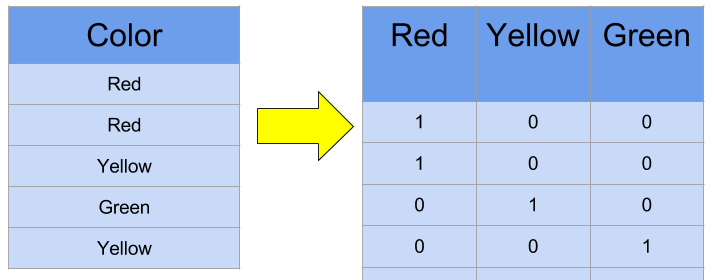

In [87]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
enc_OneHot = OneHotEncoder(handle_unknown='ignore')
enc_OneHot.fit(df[['categoria']])

OneHotEncoder(handle_unknown='ignore')

In [89]:
categoria_bin = enc_OneHot.transform(df[['categoria']]).toarray()
df_categoria = pd.concat([df['categoria'], pd.DataFrame(categoria_bin, columns = enc_OneHot.get_feature_names())], axis = 1)
df_categoria.head()

,categoria,x0_actualidad,x0_ajedrez,x0_america,x0_branded_content,x0_buenavida,x0_ccaa,x0_ciencia,x0_clima-y-medio-ambiente,x0_comunicacion,...,x0_planeta_futuro,x0_podcasts,x0_politica,x0_retina,x0_revista-de-verano,x0_sociedad,x0_sup_cultural,x0_tecnologia,x0_television,x0_videos
0,deportes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,deportes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ccaa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,internacional,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ccaa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> **Label Encoder**

Esta técnica de transformación de variables categóricas genera una columna numérica, asignando a cada categoría un entero.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder

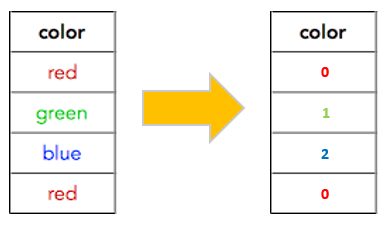

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
enc_Label = LabelEncoder()
enc_Label.fit(df['categoria'])

LabelEncoder()

In [92]:
enc_Label.transform(df['categoria'])

array([10, 10,  5, ..., 33, 12,  5])

In [93]:
categoria_label = pd.DataFrame(enc_Label.transform(df['categoria']), columns = ['LabelEncoder'])
df_categoria_label = pd.concat([df['categoria'], categoria_label], axis = 1)
df_categoria_label.head()

,categoria,LabelEncoder
0,deportes,10
1,deportes,10
2,ccaa,5
3,internacional,24
4,ccaa,5


In [94]:
pd.DataFrame(df_categoria_label[['categoria', 'LabelEncoder']].value_counts())

,,0
categoria,LabelEncoder,
ccaa,5,4869
general,19,4160
economia,12,3235
internacional,24,2654
cultura,9,2635
deportes,10,2121
politica,33,1997
sociedad,36,828
espana,16,796


> **Target Encoder**

Esta técnica de transformación de variables categóricas genera una columna numérica por cada valor de la variable categórica con la probabilidad dada la categoría respecto a la probabilidad a priori de los datos de entrenamiento.

Se construye un encoder personalizado que calcule la probabilidad del target, diferente de 0, dada la categoría.

In [95]:
class targetEncoder():

    # Metodo iniciador
    def __init__(self):
        # Variables necesarias para toda la clase 
        # que serán utilizadas en el resto de métodos
        self.target_vals = None
        self.proportions = None
        self.cols = None
      
    # Método para entrenar el encoder
    def fit(self, X, y, cols = []):
        if cols == []:
            cols = list(X)
        self.cols = cols
        target_vals = list(y.unique())
        target_vals.remove('0')
        self.target_vals = target_vals
        
        dict_proportions = {}
        for col in cols:
            dict_proportions[col] = {}
            for value in target_vals:
                dict_proportions[col][value] = {}
                for col_val in list(X[col].unique()):
                    aux = X[X[col] == col_val]
                    y_aux = y[aux.index]
                    N = sum(X[col] == col_val)
                    n1 = sum(y_aux == value)
                    proportion = n1/N
                    dict_proportions[col][value][col_val] = proportion
        
        self.proportions = dict_proportions
        return self
    
    # Método de transfromación del encoder
    def transform(self, X):
        cols = self.cols
        for col in cols:
            for value in self.target_vals:
                new_col = f'{col}_{value}'
                for col_val in list(X[col].unique()):
                    proportion_aux = self.proportions[col][value][col_val]
                    X.loc[X[col] == col_val, new_col] = proportion_aux
            del X[col]

        return X

In [96]:
X = df.drop(columns = ['target'])
y = df['target']

In [97]:
print(list(X))
X

['datetime', 'categoria', 'titulo']


,datetime,categoria,titulo
0,2014-10-16T21:33:18,deportes,Spanoulis doblega al Valencia
1,2019-09-19T14:25:08,deportes,‘France Football’ crea un Balón de Oro para po...
2,2013-11-17T14:29:25,ccaa,El PNV defiende consensuar “el punto de partid...
3,2016-10-27T07:33:12,internacional,Unicef denuncia la muerte de 22 niños en un at...
4,2013-06-23T19:04:08,ccaa,Més enllà d’una novel·la
...,...,...,...
24995,2021-03-03,general,Las cinco noticias clave del 3 de marzo
24996,2013-10-21T18:46:09,politica,El Gobierno deja en manos de los tribunales la...
24997,2017-07-11T07:13:23,politica,Dastis tranquiliza a Canarias ante la delimita...
24998,2014-09-15T14:27:31,economia,La OCDE rebaja sus perspectivas para 2014 y 20...


In [98]:
y

0        1
1        0
2        2
3        0
4        0
        ..
24995    0
24996    1
24997    1
24998    2
24999    2
Name: target, Length: 25000, dtype: object

In [99]:
enc_target = targetEncoder()
enc_target.fit(X, y, cols = ['categoria'])

In [100]:
enc_target.proportions

{'categoria': {'1': {'deportes': 0.3319189061763319,
   'ccaa': 0.3286095707537482,
   'internacional': 0.340241145440844,
   'cultura': 0.33092979127134725,
   'politica': 0.32799198798197293,
   'general': 0.3439903846153846,
   'economia': 0.34034003091190107,
   'sociedad': 0.3188405797101449,
   'mexico': 0.39568345323741005,
   'eps': 0.3333333333333333,
   'opinion': 0.3769968051118211,
   'espana': 0.35050251256281406,
   'icon-design': 0.5294117647058824,
   'tecnologia': 0.33152173913043476,
   'buenavida': 0.3333333333333333,
   'clima-y-medio-ambiente': 0.42857142857142855,
   'icon': 0.3333333333333333,
   'ciencia': 0.35294117647058826,
   'television': 0.3673469387755102,
   'sup_cultural': 0.1774193548387097,
   'diario': 0.2663316582914573,
   'gente': 0.3253968253968254,
   'ods': 0.33962264150943394,
   'escaparate': 0.34782608695652173,
   'mamas-papas': 0.375,
   'educacion': 0.36,
   'ideas': 0.4594594594594595,
   'videos': 0.30434782608695654,
   'revista-de-ver

In [101]:
enc_target.transform(X)

,datetime,titulo,categoria_1,categoria_2
0,2014-10-16T21:33:18,Spanoulis doblega al Valencia,0.331919,0.344649
1,2019-09-19T14:25:08,‘France Football’ crea un Balón de Oro para po...,0.331919,0.344649
2,2013-11-17T14:29:25,El PNV defiende consensuar “el punto de partid...,0.328610,0.336414
3,2016-10-27T07:33:12,Unicef denuncia la muerte de 22 niños en un at...,0.340241,0.334966
4,2013-06-23T19:04:08,Més enllà d’una novel·la,0.328610,0.336414
...,...,...,...,...
24995,2021-03-03,Las cinco noticias clave del 3 de marzo,0.343990,0.326442
24996,2013-10-21T18:46:09,El Gobierno deja en manos de los tribunales la...,0.327992,0.342013
24997,2017-07-11T07:13:23,Dastis tranquiliza a Canarias ante la delimita...,0.327992,0.342013
24998,2014-09-15T14:27:31,La OCDE rebaja sus perspectivas para 2014 y 20...,0.340340,0.325811
